In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.3 MB/s 
     |████████████████████████████████| 1.4 MB 14.1 MB/s 
     |████████████████████████████████| 42 kB 694 kB/s 
     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 1.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=e75b81ae51d6b2173113e75518375a1420fde64045d6a00f55703f1819650573
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from googletrans import Translator
import tensorflow as tf
from tensorflow.keras import layers
translator = Translator()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/Thesis Datasets/Dataset1_PreAugmentation.csv")
data1=data1.drop('Unnamed: 0',axis=1)
data2=pd.read_csv("/content/drive/MyDrive/Thesis Datasets/Dataset2_PreAugmentation.csv")
data2=data2.drop("Unnamed: 0",axis=1)

In [ ]:
data1.shape

(17131, 3)

In [ ]:
data2.shape

(3035, 3)

<BarContainer object of 3 artists>

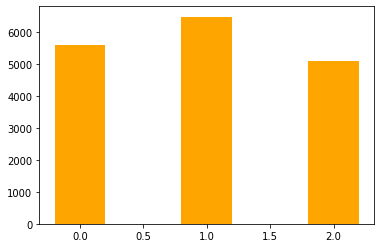

In [ ]:
plt.bar(data1["Label"].unique(),data1["Label"].value_counts(),color ='orange',width = 0.4)

<BarContainer object of 3 artists>

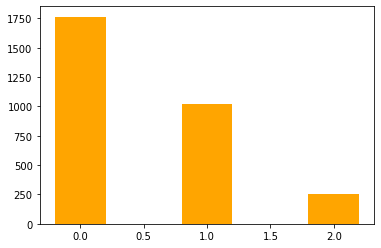

In [ ]:
plt.bar(data2["Label"].unique(),data2["Label"].value_counts(),color ='orange',width = 0.4)

In [ ]:
def back_Slash_N_Remover(sentence):
  sent=""
  for i in range(len(sentence)):
    if (i+1<len(sentence) and sentence[i]=="\\" and sentence[i+1]=="n") or (i-1>=0 and sentence[i-1]=="\\" and sentence[i]=="n"):
      sent+=" "
    else:
      sent+=sentence[i]
  return sent



def hyper_Link_Remover(sentence):
  sent=""
  count=0
  for i in range (len(sentence)):
    match="https://"
    get=""
    st=sentence[i:]
    for j in range(len(st)):

      if match!=get:
        get+=st[j]
        
      if len(match)==len(get):
        break
    if match==get:
      count+=22
      continue
    if(count==0):
      sent+=sentence[i]
    if count>0:
      
      count=count-1
  return sent


def isBackSlash(elm):
  arr=[]
  for i in range(len(elm)):
    if elm[i]=="\\":
      arr.append(i)
  if len(arr)>=4 or len(arr)>=3:
    count=0
    for i in range(len(arr)):
      if i+1<len(arr) and arr[i+1]-arr[i]==4:
        count=count+1
    
    if count>=3 or count>=2:
      return arr
    else:
      return []
  return []





def back_Slash_Remover(sentence):
  word_arr=sentence.split()
  arr=[]
  for ch in word_arr:
    re_arr=isBackSlash(ch)
    if len(re_arr)>=4 or len(re_arr)>=3:
      ch1=ch[:re_arr[0]]
      ch2=ch[re_arr[len(re_arr)-1]+4:]
      if ch1+ch2 !="":
        arr.append(ch1+ch2)
    else:
      arr.append(ch)
  return arr


In [ ]:

def isEnd(sent,index):
  for i in range(index+1,len(sent)):
    if(sent[i]!=" "):
      return False

  return True


def isTag(string):
  if string[0]=="@":
    for ch in string[::-1]:
      if ch=="\\":
        return False
    return True
  return False


def underScore_Remover(sentence_arr):
  sent=""
  for w in sentence_arr:
    if isTag(w):
      sent+="__ "
    else:
      sent+=w+" "
  return sent

def sentence_Spliter(sent):
  string=""
  split_arr=[]
  for i in range(len(sent)):
    #if fullstop apper
    if i+1<len(sent) and sent[i]=="." and not(isEnd(sent,i)) and not(sent[i-1]=="." or sent[i+1]=="."):
      split_arr.append(string)
      string=""
    else:
      string+=sent[i]
    if i==len(sent)-1:
      split_arr.append(string)
      string="" 
  return split_arr


In [ ]:
def ifHindi(sentence):
  arr=sentence.split(" ")
  syn_dic={}
  for elm in arr:
    d=translator.translate(elm,dest='hi')
    d=translator.translate(d.text,dest='en')
    d=translator.translate(d.text,dest='hi')
    if d.extra_data["all-translations"]!=None:
     syn_dic[elm]=d.extra_data["all-translations"][0][1]
    
  return syn_dic


  
def ifEnglish(sentence):
  arr=sentence.split(" ")
  syn_dic={}
  for elm in arr:
    d=translator.translate(elm,dest='hi')
    d=translator.translate(d.text,dest='en')
    if d.extra_data["all-translations"]!=None:
      syn_dic[elm]=d.extra_data["all-translations"][0][1]
    
  return syn_dic 

In [ ]:
def agumentSentece(key_list,string,dictionary,no_sentecce):
   sent_arr=[]
   for i in range(no_sentecce):
     for k in range(len(key_list)):
       sent=""
       split_word=string.split()
       for word in split_word:
         if word==key_list[k]:
           if i<len(dictionary[key_list[k]]):
             sent=sent+" "+dictionary[key_list[k]][i]
           else:
             sent=""
             break
         else:
           sent=sent+" "+word
           
       if sent!="":
         sent_arr.append(sent)
   return sent_arr

#Dataset1 Augmentation

In [ ]:
def agument(label):
  count=0
  data_arr=[]
  label_arr=[]
  for labl in data1["Label"]:
    
    if labl==label:
      txt=data1["Text"][count]
      arr=sentence_Spliter(underScore_Remover(back_Slash_Remover(hyper_Link_Remover(back_Slash_N_Remover(txt)))))
      if len(arr)==1:
        translator = Translator()
        translation = translator.detect(arr[0])
        if translation.lang=="hi":
          dictionary=ifHindi(arr[0])
          key_list=list(dictionary.keys())
          sent_arr=agumentSentece(key_list,arr[0],dictionary,5)
          c=0
          for st in sent_arr:
            st=translator.translate(st,dest='hi')
            if c<5:
              if arr[0]!=st.pronunciation:
                data_arr.append(st.pronunciation)
                label_arr.append(label)
            c=c+1
        if translation.lang=="en":
          dictionary=ifEnglish(arr[0])
          key_list=list(dictionary.keys())
          sent_arr=agumentSentece(key_list,arr[0],dictionary,5)
          c=0
          for st in sent_arr:
            if c<5:
              if arr[0]!=st:
                data_arr.append(st)
                label_arr.append(label)
            c=c+1
      
      if len(arr)>1:
        sent_arr=""
        for i in range(len(arr)):
          translator = Translator()
          translation = translator.detect(arr[i])
          if translation.lang=="hi":
            dictionary=ifHindi(arr[i])
            key_list=list(dictionary.keys())
            string_arr1=agumentSentece(key_list,arr[i],dictionary,1)
            if len(string_arr1)>0:
              st=translator.translate(string_arr1[-1],dest='hi')
              sent_arr+=st.pronunciation+"."
            else:
              sent_arr+=arr[i]+"."
          if translation.lang=="en":
            dictionary=ifEnglish(arr[i])
            key_list=list(dictionary.keys())
            string_arr2=agumentSentece(key_list,arr[i],dictionary,1)
            if len(string_arr2)>0:
              sent_arr+=string_arr2[-1]+"."
            else:
              sent_arr+=arr[i]+"."
        
        data_arr.append(sent_arr)
        label_arr.append(label)
        
       
    count=count+1
    
  
  data1 = {'Label': data_arr,'Text': label_arr}        
  df = pd.DataFrame(data1)
    
  df.to_csv('/content/Dataset1_after_augmentation', mode='a', index=False, header=False)

In [ ]:
agument(0)

In [ ]:
agument(1)

In [ ]:
agument(2)

#Dataset2 Augmentation

In [ ]:
def agument(label):
  count=0
  data_arr=[]
  label_arr=[]
  for labl in data2["Label"]:
    
    if labl==label:
      txt=data2["Text"][count]
      arr=sentence_Spliter(underScore_Remover(back_Slash_Remover(hyper_Link_Remover(back_Slash_N_Remover(txt)))))
      if len(arr)==1:
        translator = Translator()
        translation = translator.detect(arr[0])
        if translation.lang=="hi":
          dictionary=ifHindi(arr[0])
          key_list=list(dictionary.keys())
          sent_arr=agumentSentece(key_list,arr[0],dictionary,5)
          c=0
          for st in sent_arr:
            st=translator.translate(st,dest='hi')
            if c<5:
              if arr[0]!=st.pronunciation:
                data_arr.append(st.pronunciation)
                label_arr.append(label)
            c=c+1
        if translation.lang=="en":
          dictionary=ifEnglish(arr[0])
          key_list=list(dictionary.keys())
          sent_arr=agumentSentece(key_list,arr[0],dictionary,5)
          c=0
          for st in sent_arr:
            if c<5:
              if arr[0]!=st:
                data_arr.append(st)
                label_arr.append(label)
            c=c+1
      
      if len(arr)>1:
        sent_arr=""
        for i in range(len(arr)):
          translator = Translator()
          translation = translator.detect(arr[i])
          if translation.lang=="hi":
            dictionary=ifHindi(arr[i])
            key_list=list(dictionary.keys())
            string_arr1=agumentSentece(key_list,arr[i],dictionary,1)
            if len(string_arr1)>0:
              st=translator.translate(string_arr1[-1],dest='hi')
              sent_arr+=st.pronunciation+"."
            else:
              sent_arr+=arr[i]+"."
          if translation.lang=="en":
            dictionary=ifEnglish(arr[i])
            key_list=list(dictionary.keys())
            string_arr2=agumentSentece(key_list,arr[i],dictionary,1)
            if len(string_arr2)>0:
              sent_arr+=string_arr2[-1]+"."
            else:
              sent_arr+=arr[i]+"."
        
        data_arr.append(sent_arr)
        label_arr.append(label)
        
       
    count=count+1
    
  
  data2 = {'Label': data_arr,'Text': label_arr}        
  df = pd.DataFrame(data2)
    
  df.to_csv('Dataset2_after_augmentation', mode='a', index=False, header=False)    
    

In [ ]:
agument(0)

In [ ]:
agument(1)

In [ ]:
agument(2)